In [3]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

THIS_DIR = os.path.abspath(os.path.dirname("."))
DATA_DIR = os.path.join(THIS_DIR, "data")
RUN = True

insecure_add = os.path.join(DATA_DIR, "insecure_add.txt")
insecure_mul = os.path.join(DATA_DIR, "insecure_mul.txt")
secure_add = os.path.join(DATA_DIR, "secure_add.txt")
secure_mul = os.path.join(DATA_DIR, "secure_mul.txt")
fh_add = os.path.join(DATA_DIR, "fh_add.txt")
fh_mul = os.path.join(DATA_DIR, "fh_mul.txt")

insecure_n = 1
secure_n = 30

def create_df(path):
    data = pd.DataFrame([], columns=['size', 'time'])
    data.to_csv(path, index=False)

## Insecure Add

In [88]:
if (RUN):
    !rm $insecure_add
    !python3 insecure_add.py $insecure_n

In [89]:
insecure_add_data = pd.read_csv(insecure_add)
add_y = np.array([insecure_add_data.iloc[0, 1]] * secure_n)

## Insecure Mul

In [90]:
if (RUN):
    !rm $insecure_mul
    !python3 insecure_mul.py $insecure_n

In [91]:
insecure_mul_data = pd.read_csv(insecure_mul)
mul_y = np.array([insecure_mul_data.iloc[0, 1]] * secure_n)

## Secure Add

In [2]:
if (RUN):
    !rm $secure_add
    create_df(secure_add)

    for i in range(1, secure_n + 1):
        !python3 secure_add.py -M$i -B 11111


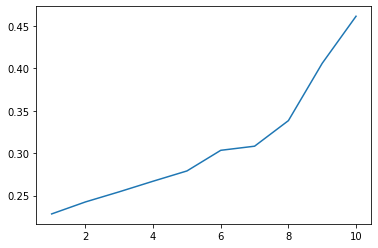

In [93]:
secure_add_data = pd.read_csv(secure_add)
s_add_x = secure_add_data.iloc[:, 0]
s_add_y = secure_add_data.iloc[:, 1]
plt.plot(sadd_x,sadd_y)

## Secure Mul

In [7]:
if (RUN):
    !rm $secure_mul
    create_df(secure_mul)

    for i in range(10, 25 + 1):
        !python3 secure_mul.py -M$i -B 11111

2020-12-12 15:20:38,252 Start MPyC runtime v0.7.1
2020-12-12 15:20:38,372 All 10 parties connected.
Iteration: 10, Sample 0
Iteration: 10, Sample 1
Iteration: 10, Sample 2
Iteration: 10, Sample 3
Iteration: 10, Sample 4
Iteration: 10, Sample 5
Iteration: 10, Sample 6
Iteration: 10, Sample 7
Iteration: 10, Sample 8
Iteration: 10, Sample 9
Iteration: 10, Sample 10
Iteration: 10, Sample 11
Iteration: 10, Sample 12
Iteration: 10, Sample 13
Iteration: 10, Sample 14
Iteration: 10, Sample 15
Iteration: 10, Sample 16
Iteration: 10, Sample 17
Iteration: 10, Sample 18
Iteration: 10, Sample 19
^C
/home/kyle/.local/lib/python3.8/site-packages/mpyc/asyncoro.py:376: RuntimeWarning: coroutine 'Runtime._reshare' was never awaited
  coro = func(*args, **kwargs)
Traceback (most recent call last):
  File "secure_mul.py", line 54, in <module>
    main()
  File "secure_mul.py", line 41, in main
    mpc.run(mpc.output(many_secure_mul(s, 100)))
  File "/home/kyle/.local/lib/python3.8/site-packages/mpyc/runti

^C
Traceback (most recent call last):
  File "secure_mul.py", line 6, in <module>
    import pandas as pd
  File "/home/kyle/.local/lib/python3.8/site-packages/pandas/__init__.py", line 52, in <module>
    from pandas.core.api import (
  File "/home/kyle/.local/lib/python3.8/site-packages/pandas/core/api.py", line 29, in <module>
    from pandas.core.groupby import Grouper, NamedAgg
  File "/home/kyle/.local/lib/python3.8/site-packages/pandas/core/groupby/__init__.py", line 1, in <module>
    from pandas.core.groupby.generic import DataFrameGroupBy, NamedAgg, SeriesGroupBy
  File "/home/kyle/.local/lib/python3.8/site-packages/pandas/core/groupby/generic.py", line 57, in <module>
    from pandas.core.aggregation import (
  File "/home/kyle/.local/lib/python3.8/site-packages/pandas/core/aggregation.py", line 27, in <module>
    from pandas.core.series import FrameOrSeriesUnion, Series
  File "/home/kyle/.local/lib/python3.8/site-packages/pandas/core/series.py", line 4996, in <module>
   

^C
Traceback (most recent call last):
  File "secure_mul.py", line 3, in <module>
    from mpyc.runtime import mpc
  File "/home/kyle/.local/lib/python3.8/site-packages/mpyc/runtime.py", line 1978, in <module>
    mpc = setup()
  File "/home/kyle/.local/lib/python3.8/site-packages/mpyc/runtime.py", line 1958, in setup
    subprocess.Popen(cmd_line, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
  File "/usr/lib/python3.8/subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.8/subprocess.py", line 1658, in _execute_child
    part = os.read(errpipe_read, 50000)
KeyboardInterrupt


UnboundLocalError: local variable 'child' referenced before assignment

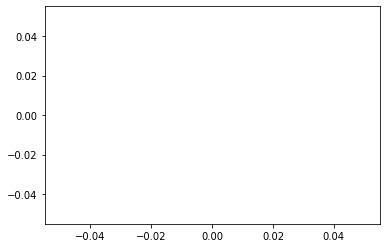

In [8]:
secure_mul_data = pd.read_csv(secure_mul)
s_mul_x = secure_mul_data.iloc[:, 0]
s_mul_y = secure_mul_data.iloc[:, 1]
plt.plot(s_mul_x,s_mul_y)

## FH Add

In [96]:
if (RUN):
    !rm $fh_add
    !python3 fh_add.py $secure_n

In [105]:
fh_add_data = pd.read_csv(fh_add)
fh_add_y = np.array([fh_add_data.iloc[0, 1]] * secure_n)

## FH Mul

In [106]:
if (RUN):
    !rm $fh_mul
    !python3 fh_mul.py $secure_n

In [107]:
fh_mul_data = pd.read_csv(fh_mul)
fh_mul_y = np.array([fh_mul_data.iloc[0, 1]] * secure_n)

## Comparison

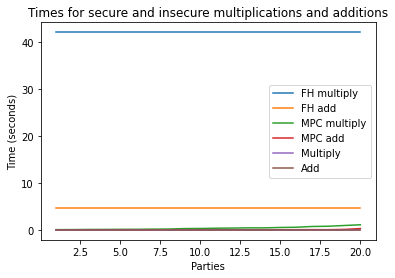

In [112]:
plt.plot(s_add_x, fh_mul_y, label="FH multiply")
plt.plot(s_add_x, fh_add_y, label="FH add")

plt.plot(s_add_x, s_mul_y, label="MPC multiply")
plt.plot(s_add_x, s_add_y, label="MPC add")

plt.plot(s_add_x, mul_y, label="Multiply")
plt.plot(s_add_x, add_y, label="Add")

plt.xlabel("Parties")
plt.ylabel("Time (seconds)")
plt.title("Times for secure and insecure multiplications and additions")
plt.legend()
plt.show()

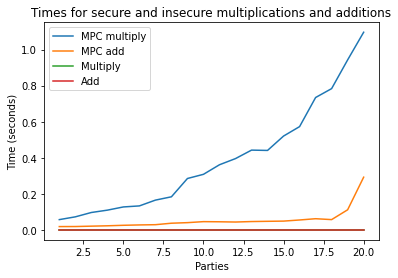

In [113]:
plt.plot(s_add_x, s_mul_y, label="MPC multiply")
plt.plot(s_add_x, s_add_y, label="MPC add")

plt.plot(s_add_x, mul_y, label="Multiply")
plt.plot(s_add_x, add_y, label="Add")

plt.xlabel("Parties")
plt.ylabel("Time (seconds)")
plt.title("Times for secure and insecure multiplications and additions")
plt.legend()
plt.show()

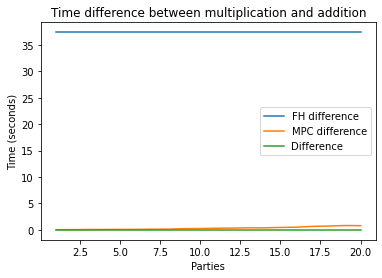

In [114]:
plt.plot(s_add_x, fh_mul_y - fh_add_y, label="FH difference")
plt.plot(s_add_x, s_mul_y - s_add_y, label="MPC difference")
plt.plot(s_add_x, mul_y - add_y, label="Difference")

plt.xlabel("Parties")
plt.ylabel("Time (seconds)")
plt.title("Time difference between multiplication and addition")
plt.legend()
plt.show()

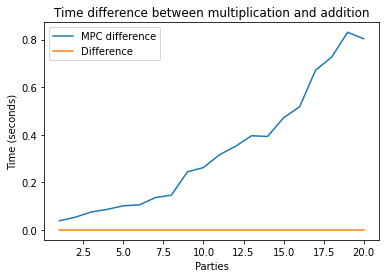

In [115]:
plt.plot(s_add_x, s_mul_y - s_add_y, label="MPC difference")
plt.plot(s_add_x, mul_y - add_y, label="Difference")

plt.xlabel("Parties")
plt.ylabel("Time (seconds)")
plt.title("Time difference between multiplication and addition")
plt.legend()
plt.show()